# EDA and preprocessing of the totalVI_10x adt dataset

In [21]:
import anndata as ad
import scanpy as sc
import seaborn as sns

from lab_scripts.utils import utils
utils.change_directory_to_repo()
from lab_scripts.data.preprocessing.common import adt_normalization

sc.settings.verbosity = 3  # show info messages
sc.set_figure_params(figsize=(5, 3))  # set figsize for plots

%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [22]:
data = ad.read_h5ad("data/raw/gex_adt/totalVI_10x_adt.h5ad")

[Text(0.5, 1.0, 'Histogram of number of counts per cell')]

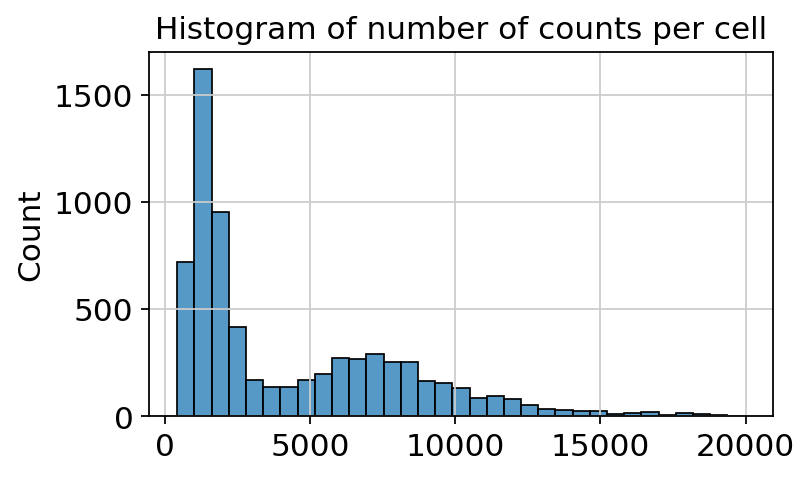

In [23]:
plot = sns.histplot(data.X.sum(axis=1))
plot.set(title='Histogram of number of counts per cell')

[Text(0.5, 1.0, 'Histogram of number of counts per cell')]

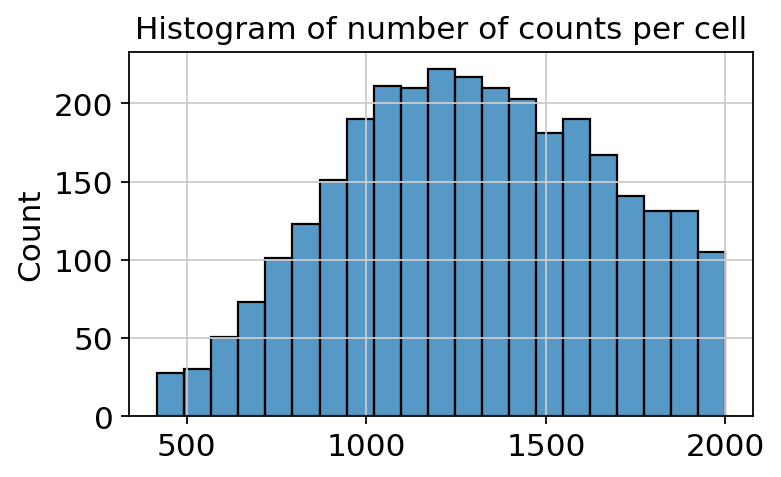

In [24]:
# Let's zoom
n_counts = data.X.sum(axis=1)
plot = sns.histplot(n_counts[n_counts < 2000])
plot.set(title='Histogram of number of counts per cell')

It's good enough already.

[Text(0.5, 1.0, 'Histogram of detected ADTs per cell')]

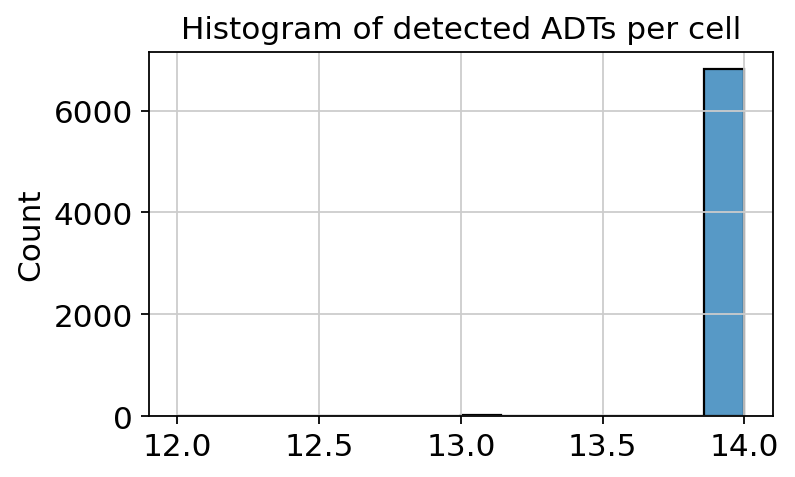

In [25]:
plot = sns.histplot((data.X > 0).sum(axis=1))
plot.set(title='Histogram of detected ADTs per cell')

In [26]:
(data.X > 0).sum(axis=1).min()

12

Each cell has not less than 12 detected ADTs. Great.

In [27]:
data.X = adt_normalization.CLR_transform(data.X)

[Text(0.5, 1.0, 'Normalized of number of counts per cell')]

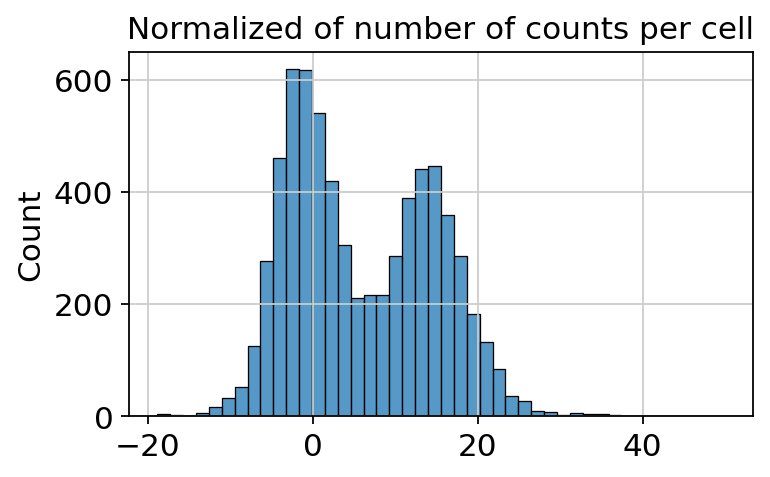

In [28]:
plot = sns.histplot(data.X.sum(axis=1))
plot.set(title='Normalized of number of counts per cell')